# Paper 1 - on- and offshore wind
(2023-09-11)

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime as dt
# import seaborn as sns

import matplotlib.pyplot as plt
from pylab import savefig
plt.switch_backend('agg')  # save image in plt

from utils_LH import Dir, new_lat, new_lon, df_GWL, list_lgcGWL, anomalies_perGWL, df_GWL_season, GWL_groups

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]  # increase size of inline figure

import cartopy
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import string

from utils_LH import GWL_table, rotated_projection_cosmo, cosmo_map_extent, newcmap_OrGy  #, anomalies_perGWL 
from utils_LH import Dir, new_lat, new_lon, lat, lon, df_GWL, list_lgcGWL, df_GWL_season


/net/respos/linhho/energy_model/
/home/linhho/Documents/Code_PhD/CONST//COSMO_REA6_CONST_withOUTsponge.nc
   Year  Month  Day  id_EGWL EGWL  id_lgcGWL lgcGWL       Date  Season
0  1995      1    1       20   Np         13     Nz 1995-01-01  winter
1  1995      1    2       20   Np         13     Nz 1995-01-02  winter
2  1995      1    3       20   Np         13     Nz 1995-01-03  winter
3  1995      1    4        7  BMp         10     BM 1995-01-04  winter
4  1995      1    5        7  BMp         10     BM 1995-01-05  winter
      Year  Month  Day  id_EGWL EGWL  id_lgcGWL lgcGWL       Date  Season
9232  2020      4   11        1  HMa          9     HM 2020-04-11  winter
9233  2020      4   12        1  HMa          9     HM 2020-04-12  winter
9234  2020      4   13       18  HBc         16     HB 2020-04-13  winter
9235  2020      4   14       18  HBc         16     HB 2020-04-14  winter
9236  2020      4   15       18  HBc         16     HB 2020-04-15  winter


/home/linhho/miniconda3/envs/py3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [3]:
import gc

gc.collect()

52

In [ ]:
## Installed capacity for Germany


# cnt = 'germany'
# fname = '/home/linhho/Documents/Code_PhD/mask_country_rea6/mask_{}.pckl'.format(cnt)
# obj = pd.read_pickle(fname)
# mask_cnt = np.logical_not(obj[::8,::8])

## 2050
filename = '/home/linhho/Documents/Code_PhD/DATA/CLIMIX/installed_capacity_PV_wind_power_from_CLIMIX_final.nc'
ds = xr.open_dataset(filename)
ic_wp_all = np.nansum(ds['ic_wp'].data, axis=0) +  np.nansum(ds['ic_wp2050'].data, axis=0)
# ic_wp2050 = ds['ic_wp2050'].data
ic_PV = ds['ic_PV2050'].data[0]

# cnt_ic_wp = np.ma.array(ic_wp_all, mask=mask_cnt)
# cnt_ic_pv = np.ma.array(ic_PV, mask=mask_cnt)

# print("For scenario-2050, installed capacity for Germany for PV power is {:.2f} and for wind power is {:.2f} GW".format(np.nansum(cnt_ic_pv)/1000, np.nansum(cnt_ic_wp)/1000))

# ## 2019
# ic_wp_2019  = ic_wp_all*167/440
# ic_PV_2019  = ic_PV*120/870
# cnt_ic_wp_2019 = np.ma.array(ic_wp_2019, mask=mask_cnt)
# cnt_ic_pv_2019 = np.ma.array(ic_PV_2019, mask=mask_cnt)

# print("For scale-2019, installed capacity for Germany for PV power is {:.2f} and for wind power is {:.2f} GW".format(np.nansum(cnt_ic_pv_2019)/1000, np.nansum(cnt_ic_wp_2019)/1000))

In [24]:
d=xr.open_dataset("/home/linhho/Documents/Code_PhD/CONST/COSMO_REA6_CONST_withOUTsponge.nc")
## Mask OUT values ???
mask_land = d['FR_LAND'].data[::8, ::8] <= .5
mask_sea  = d['FR_LAND'].data[::8, ::8] > .5
# mask_sea = np.logical_not(mask_land)

(array([[87.,  0.,  0., ...,  0.,  0., 15.],
        [87.,  0.,  0., ...,  0.,  0., 16.],
        [87.,  0.,  0., ...,  1.,  0., 15.],
        ...,
        [ 8.,  1.,  0., ...,  0.,  0., 93.],
        [ 6.,  0.,  0., ...,  0.,  3., 93.],
        [ 3.,  0.,  0., ...,  0.,  1., 98.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 106 BarContainer objects>)

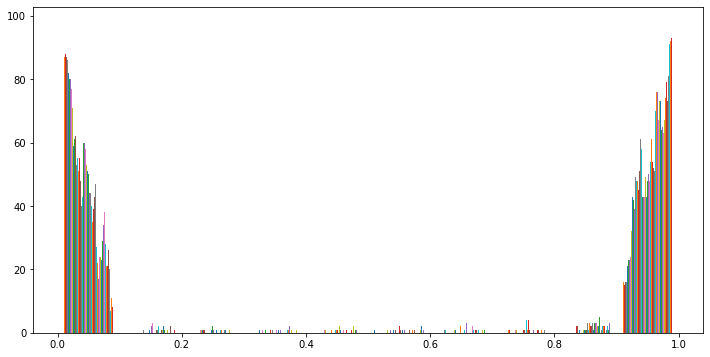

In [4]:
fig, ax = plt.subplots(figsize=[12,6])
ax.hist(d['FR_LAND'].data[::8, ::8], bins=10)

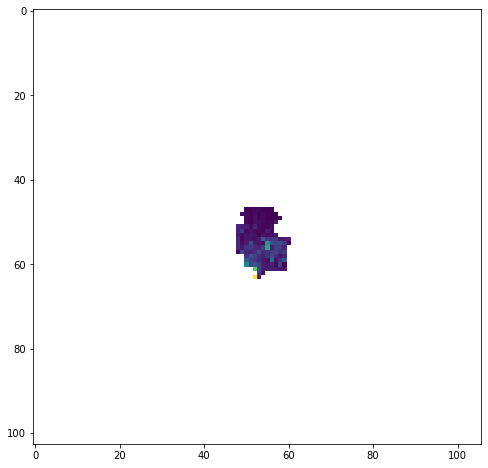

In [23]:
plt.imshow(cnt_ic_wp)

No handles with labels found to put in legend.


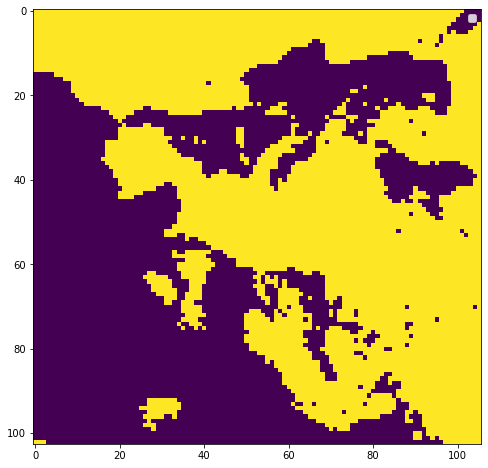

In [25]:
plt.imshow(mask_sea)
plt.legend()

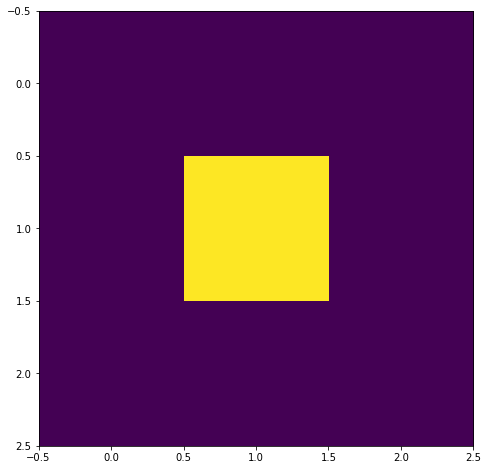

In [26]:
plt.imshow([[0,0,0],[0,1,0], [0,0,0]])

In [18]:
np.nansum(mask_land)

5866

In [8]:
wp_ic_onshore.shape

(103, 106)

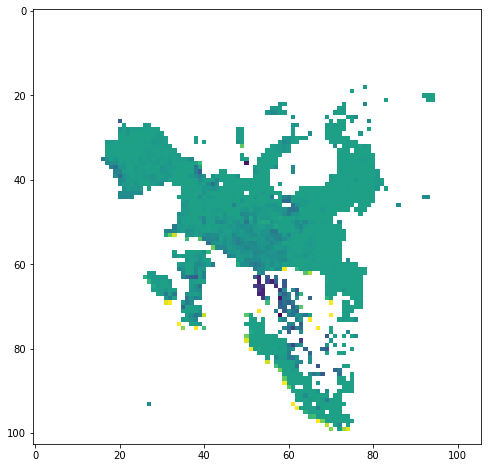

In [35]:
plt.imshow(wp_hub_onshore)

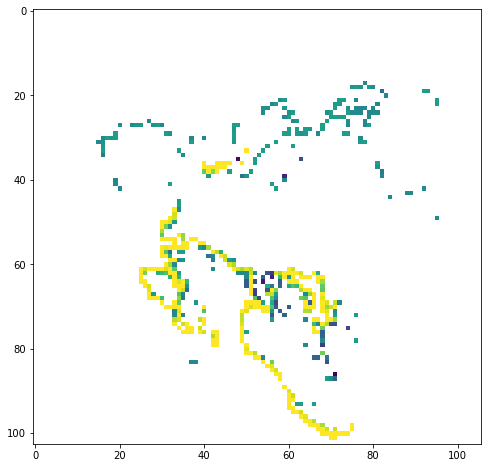

In [34]:
plt.imshow(wp_hub_offshore)

In [49]:
67.6/83.7

0.8076463560334527

In [33]:
wp_ic_all_flat = np.nansum(np.concatenate((ds['ic_wp'].data, ds['ic_wp2050'].data)), axis=0)
wp_ic_onshore = np.ma.array(wp_ic_all_flat, mask=mask_land)
wp_ic_offshore = np.ma.array(wp_ic_all_flat, mask=mask_sea)
wp_ic_onshore[wp_ic_onshore==0] = np.nan
wp_ic_offshore[wp_ic_offshore==0] = np.nan
print('Sum installed capacity for all available grid for onshore wind {:.2f} and offshore wind {:.2f}'.format(np.nansum(wp_ic_onshore)/1000, np.nansum(wp_ic_offshore)/1000))
print('Mean installed capacity for each grid for onshore wind {:.2f} and offshore wind {:.2f}'.format(np.nanmean(wp_ic_onshore), np.nanmean(wp_ic_offshore)))

wp_hub_all_flat = np.nanmean(np.concatenate((ds['hub_height'].data, ds['hub_height2050'].data)), axis=0)
wp_hub_onshore = np.ma.array(wp_hub_all_flat, mask=mask_land)
wp_hub_offshore = np.ma.array(wp_hub_all_flat, mask=np.logical_not(mask_land))
wp_hub_onshore[wp_hub_onshore==0] = np.nan
wp_hub_offshore[wp_hub_offshore==0] = np.nan
print('Mean hub height for each grid for onshore wind {:.2f} and offshore wind {:.2f}'.format(np.nanmean(wp_hub_onshore), np.nanmean(wp_hub_offshore)))
print('Min hub height for each grid for onshore wind {:.2f} and offshore wind {:.2f}'.format(np.nanmin(wp_hub_onshore), np.nanmin(wp_hub_offshore)))
print('Max hub height for each grid for onshore wind {:.2f} and offshore wind {:.2f}'.format(np.nanmax(wp_hub_onshore), np.nanmax(wp_hub_offshore)))


Sum installed capacity for all available grid for onshore wind 259.75 and offshore wind 179.80
Mean installed capacity for each grid for onshore wind 142.41 and offshore wind 334.83
Mean hub height for each grid for onshore wind 97.18 and offshore wind 120.64
Min hub height for each grid for onshore wind 34.00 and offshore wind 36.50
Max hub height for each grid for onshore wind 150.00 and offshore wind 150.00


<ipython-input-33-d011f24bd4a7>:9: RuntimeWarning: Mean of empty slice
  wp_hub_all_flat = np.nanmean(np.concatenate((ds['hub_height'].data, ds['hub_height2050'].data)), axis=0)


In [37]:
fname = Dir['out_dir'] + '/scale2019/mean_hourly_1995_2017_PV_wind_generation_scale2019.nc'
ds2019 = xr.open_dataset(fname)

wp2019_onshore = np.ma.array(ds2019['Wp2019'], mask=mask_land)
wp2019_offshore = np.ma.array(ds2019['Wp2019'], mask=mask_sea)
wp2019_onshore[wp2019_onshore==0] = np.nan
wp2019_offshore[wp2019_offshore==0] = np.nan

print('Hourly total production scenario-2050 wind power onshore {:.2f} and offshore {:.2f} GW'.format(np.nansum(wp2019_onshore)/1000, np.nansum(wp2019_offshore)/1000))

Hourly total production scenario-2050 wind power onshore 25.67 and offshore 31.76 GW


In [51]:
fname = Dir['out_dir'] + 'mean_hourly_1995_2017_PV_wind_generation.nc'
ds2050 = xr.open_dataset(fname)

wp2050_onshore = np.ma.array(ds2050['Wp2050'], mask=mask_land)
wp2050_offshore = np.ma.array(ds2050['Wp2050'], mask=mask_sea)
wp2050_onshore[wp2050_onshore==0] = np.nan
wp2050_offshore[wp2050_offshore==0] = np.nan

print('Hourly total production scenario-2050 wind power onshore {:.2f} and offshore {:.2f} GW'.format(np.nansum(wp2050_onshore)/1000, np.nansum(wp2050_offshore)/1000))
print('Hourly mean production scenario-2050 wind power onshore {:.2f} and offshore {:.2f} MW'.format(np.nanmean(wp2050_onshore), np.nanmean(wp2050_offshore)))

Hourly total production scenario-2050 wind power onshore 67.63 and offshore 83.67 GW
Hourly mean production scenario-2050 wind power onshore 37.08 and offshore 155.80 MW


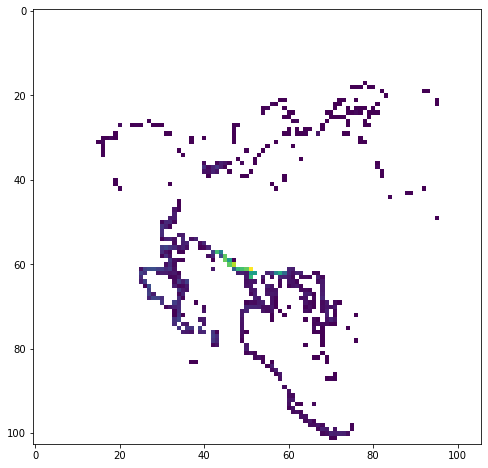

In [42]:
plt.imshow(wp2019_offshore)

In [8]:
fname = Dir['out_dir'] + '????_PV_wind_generation_v2.nc'
ds2050 = xr.open_mfdataset(fname, parallel=True)
np.nansum(ds2050['Wp2050'])/201624

151292.80509202398

/home/linhho/miniconda3/envs/py3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


Text(1, 1.0, '$[MW]$')

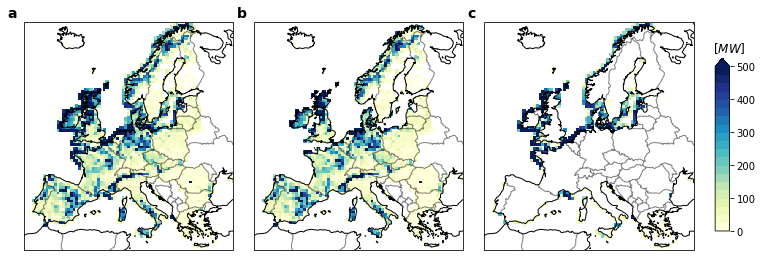

In [17]:
var1 = wp_ic_all_flat
var2 = wp_ic_offshore
var3 = wp_ic_onshore
var1[var1 == 0] = np.nan
var2[var2 == 0] = np.nan
var3[var3 == 0] = np.nan
vars_toplot = [var1, var2, var3]

fig, axs = plt.subplots(ncols=3, nrows=1, subplot_kw={'projection': rotated_projection_cosmo}, figsize=(10,4))
fig.subplots_adjust(left=0.02, bottom=0.02, right=0.95, top=0.94, wspace=0.1)

axs = axs.flatten()

for idx, var in enumerate(vars_toplot):
    
    my_cmap = plt.cm.get_cmap('YlGnBu', 20)  # YlOrBr, YlGnBu
    pl1 = axs[idx].pcolormesh(new_lon, new_lat, var,
                 transform=ccrs.PlateCarree(), cmap=my_cmap)
    axs[idx].coastlines()
    axs[idx].add_feature(cartopy.feature.BORDERS, alpha = 0.5)  #linestyle=':')
    axs[idx].set_extent(cosmo_map_extent, crs=rotated_projection_cosmo)  # boundary of the map
    pl1.set_clim(0,500)
    axs[idx].text(-.08, 1.02, string.ascii_lowercase[idx], transform=axs[idx].transAxes, 
            size=14, weight='bold')

cbar_ax = fig.add_axes([.98, 0.15, 0.02, 0.6])
cbar01 = plt.colorbar(pl1, cax=cbar_ax, orientation='vertical', shrink = .5, pad=0.05, extend="max")
cbar01.ax.set_title('$[MW]$', fontsize=12, position=(1, -2))
# fig.savefig('Paper1/CLIMIXinstalledcapacity2050_wind_onoffshore_landmask_halfpoint.jpg', dpi=300, transparent=True, bbox_inches = "tight")